In [14]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
quandl.ApiConfig.api_key= 'JdDRsMuqoazxc1xaUxLz'

df= quandl.get('WIKI/AMZN')

df= df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


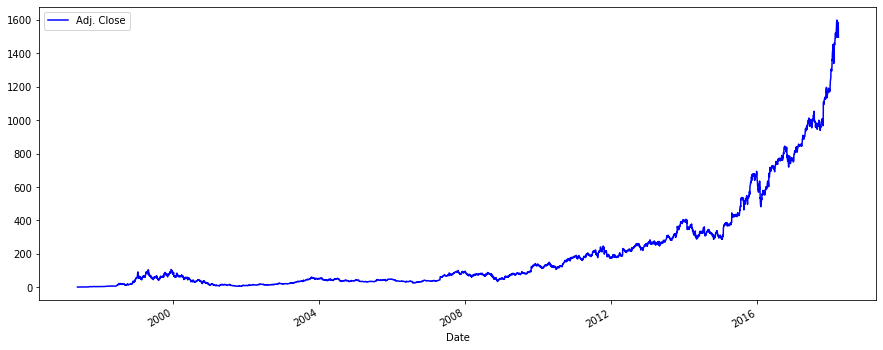

In [5]:
df['Adj. Close'].plot(figsize=(15,6), color='b')
plt.legend(loc= 'upper left')
plt.show()

In [10]:
forecast= 30
df['Prediction']= df[['Adj. Close']].shift(-forecast)

X= np.array(df.drop(['Prediction'], 1))
X= preprocessing.scale(X)

X_forecast=X[-forecast:]
X= X[:-forecast]

y= np.array(df['Prediction'])
y= y[:-forecast]

y

array([1.54166667e+00, 1.51583333e+00, 1.58833333e+00, ...,
       1.49556000e+03, 1.55586000e+03, 1.49705000e+03])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

clf= LinearRegression()
clf.fit(X_train, y_train)

confidence= clf.score(X_test, y_test)

forecast_predicted= clf.predict(X_forecast)

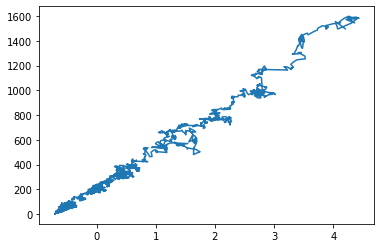

In [17]:
plt.plot(X, y)

(736425.0, 737192.5)

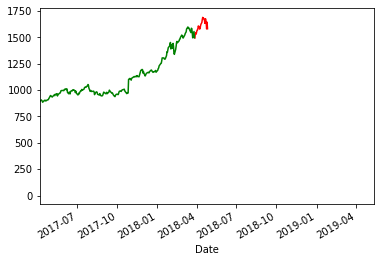

In [21]:
dates = pd.date_range(start= '2018-03-28', end='2018-04-26')
plt.plot(dates, forecast_predicted, color= 'r')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin= datetime.date(2017, 4, 6))